**Binarizing Data**

sklearn help:

* https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.binarize.html
* https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Binarizer.html#sklearn.preprocessing.Binarizer

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
print(f'pandas  version = {pd.__version__}')
print(f'numpy   version = {np.__version__}')
print(f'seaborn version = {sns.__version__}')

pandas  version = 1.1.5
numpy   version = 1.19.5
seaborn version = 0.11.1


**Boston House Prices**

https://www.kaggle.com/vikrishnan/boston-house-prices

* CRIM per capita crime rate by town
* ZN proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS proportion of non-retail business acres per town
* CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* NOX nitric oxides concentration (parts per 10 million)
* RM average number of rooms per dwelling
* AGE proportion of owner-occupied units built prior to 1940
* DIS weighted distances to five Boston employment centres
* RAD index of accessibility to radial highways
* TAX full-value property-tax rate per \$10,000
* PTRATIO pupil-teacher ratio by town
* B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT % lower status of the population
* MEDV Median value of owner-occupied homes in $1000's

In [3]:
df=pd.read_csv('https://github.com/prasertcbs/basic-dataset/raw/master/boston_house_price.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


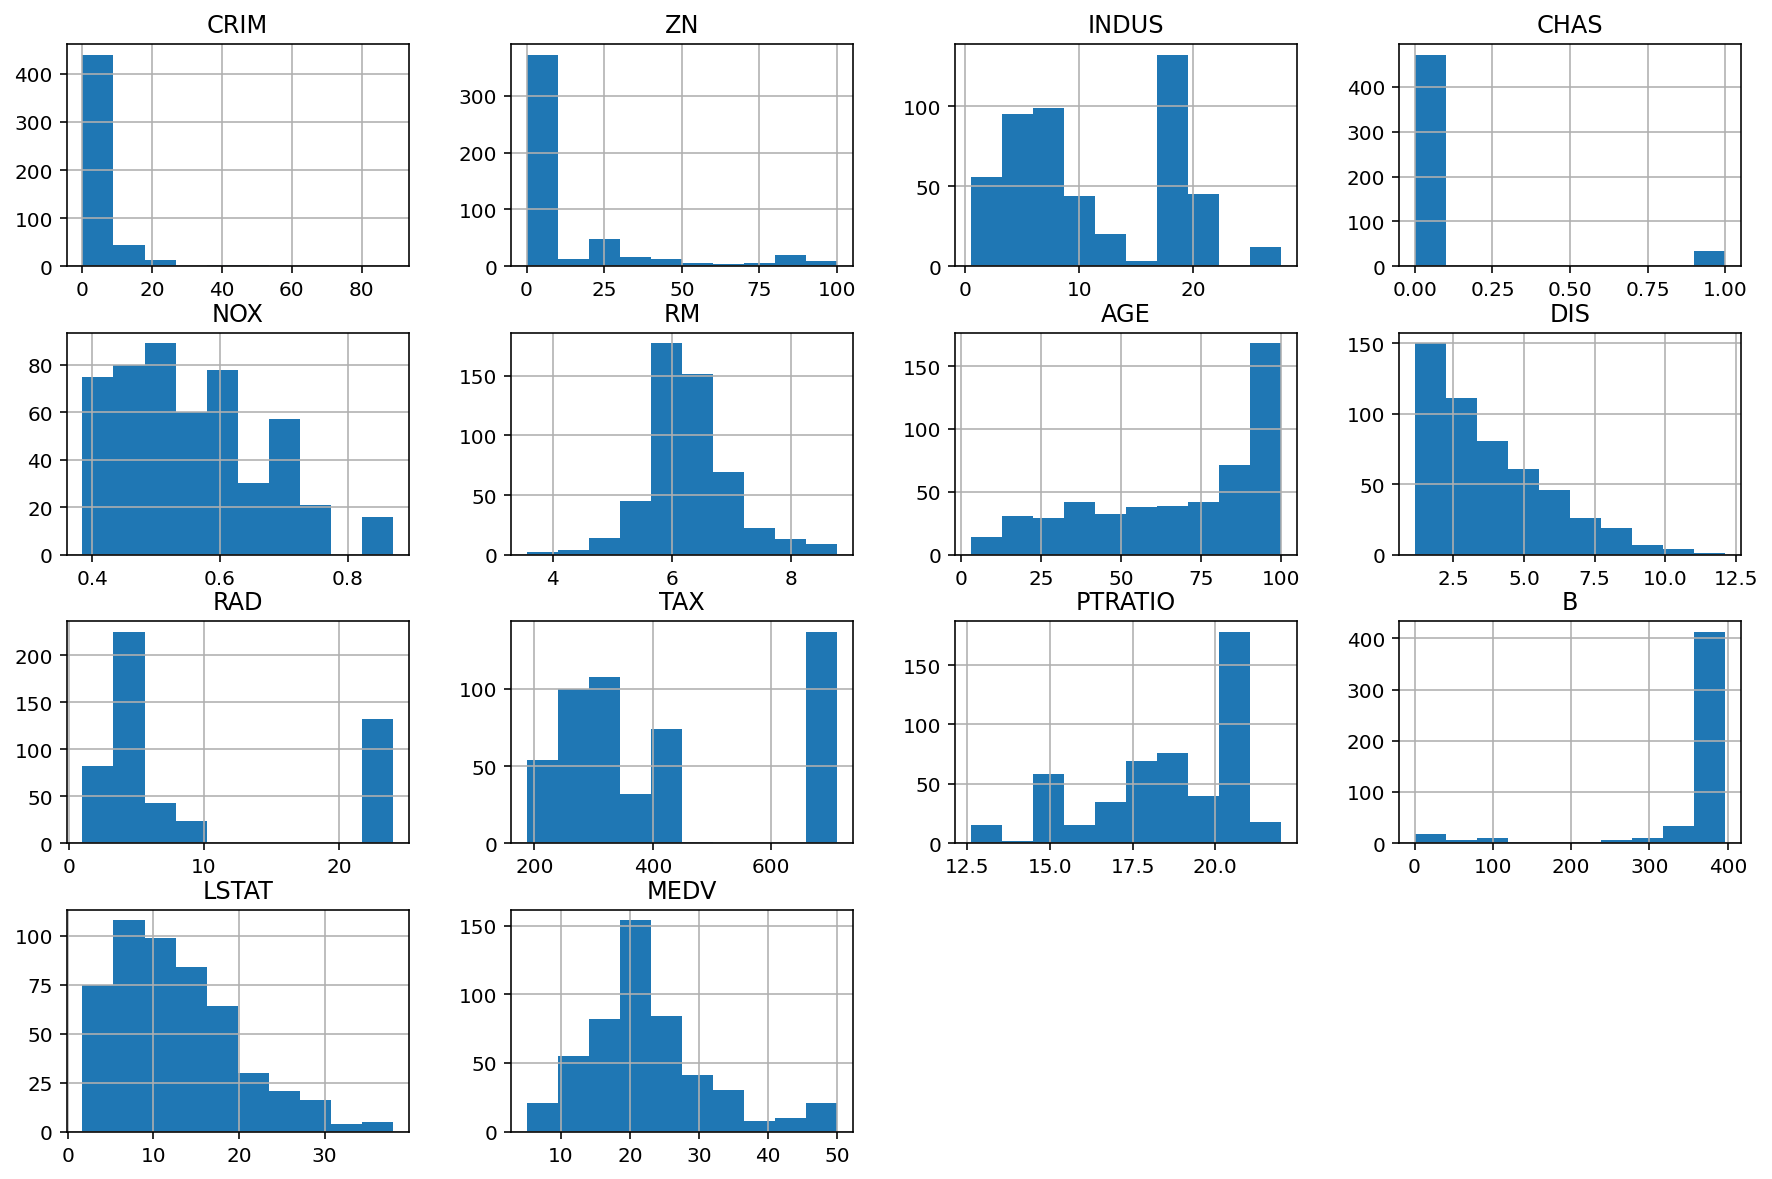

In [4]:
df.hist(figsize=(15, 10));

## **sklearn preprocessing**

In [5]:
from sklearn import preprocessing

In [6]:
df.AGE.mean()

68.57490118577078

In [7]:
(df['AGE'] > df.AGE.mean()).head()

0    False
1     True
2    False
3    False
4    False
Name: AGE, dtype: bool

In [8]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [9]:
(df['AGE'] > df.AGE.mean()).astype(int).head()

0    0
1    1
2    0
3    0
4    0
Name: AGE, dtype: int64

## **use binarize() function**

In [10]:
mat = preprocessing.binarize(df[['AGE']], threshold=df.AGE.mean()) # return 2-D numpy array
# mat = preprocessing.binarize(df[['AGE']], threshold=40) # return 2-D numpy array
mat[:5]

array([[0.],
       [1.],
       [0.],
       [0.],
       [0.]])

In [11]:
df['age_cat']=mat[:, 0]

In [12]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,age_cat
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,0.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,1.0
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,0.0
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,0.0
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,0.0


In [13]:
cols=['DIS', 'RM', 'MEDV']
mat = preprocessing.binarize(df[cols], threshold=[5, 7, df.MEDV.mean()])
mat[:5]

array([[0., 0., 1.],
       [0., 0., 0.],
       [0., 1., 1.],
       [1., 0., 1.],
       [1., 1., 1.]])

## **use Binarizer() class (good when using with pipeline)**

In [14]:
pbin = preprocessing.Binarizer(threshold=[5, 7, df.MEDV.mean()])
cols=['DIS', 'RM', 'MEDV']
mat = pbin.fit_transform(df[cols])
mat[:5]

array([[0., 0., 1.],
       [0., 0., 0.],
       [0., 1., 1.],
       [1., 0., 1.],
       [1., 1., 1.]])

In [15]:
dn=pd.concat([df, pd.DataFrame(mat, columns=['dis_cat', 'rm_cat', 'medv_cat'])], axis=1)
dn.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,age_cat,dis_cat,rm_cat,medv_cat
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,0.0,0.0,0.0,1.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,1.0,0.0,0.0,0.0
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,0.0,0.0,1.0,1.0
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,0.0,1.0,0.0,1.0
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,0.0,1.0,1.0,1.0


## **LogisticRegression for classifying house price**

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [17]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV', 'age_cat'],
      dtype='object')

In [18]:
X = df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
# binarize MEDV using the mean as a threshold
y = preprocessing.binarize(df[['MEDV']], threshold=df.MEDV.mean()) # return 2-D numpy array
test_size=0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=7)

In [19]:
model = LogisticRegression(solver='lbfgs')
model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
model.score(X_train, y_train) # accuracy of the model

0.903954802259887

In [22]:
model.intercept_

array([0.07017563])

In [23]:
model.coef_

array([[-0.08523399,  0.00899254, -0.0425457 ,  0.15235476,  0.02428331,
         0.93312484, -0.01462854, -0.33789263,  0.12579698, -0.00342022,
        -0.28147573,  0.01220221, -0.25017308]])

In [24]:
X.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [25]:
pd.Series(model.coef_.ravel(), index=X.columns)

CRIM      -0.085234
ZN         0.008993
INDUS     -0.042546
CHAS       0.152355
NOX        0.024283
RM         0.933125
AGE       -0.014629
DIS       -0.337893
RAD        0.125797
TAX       -0.003420
PTRATIO   -0.281476
B          0.012202
LSTAT     -0.250173
dtype: float64

In [26]:
from sklearn import metrics

## **scikit-learn: confusion matrix**

$$
\begin{bmatrix}
C_{0,0} &amp; C_{0,1} \\
C_{1,0} &amp; C_{1,1}
\end{bmatrix}
=
\begin{bmatrix}
tn&amp;fp \\
fn&amp;tp
\end{bmatrix}
$$
predicted false	predicted true
actual false	tn	fp
actual true	fn	tp
$$Accuracy={\frac {{TP+TN} }{TP + TN +FP + FN} }\\
Precision={\frac {TP}{TP+FP}}\\
Recall={\frac {TP}{TP+FN}}\\
F1 = 2 \times {\frac {precision \times recall} {precision + recall}}
$$

In [27]:
y_pred = model.predict(X_test)
y_pred

array([0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1.,
       1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0.,
       1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0.,
       1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0.])

In [28]:
y_test.ravel()

array([0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0.,
       1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1.,
       0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0.,
       1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.])

In [29]:
metrics.confusion_matrix(y_test, y_pred)

array([[77,  7],
       [15, 53]])

In [30]:
# pd.crosstab(y_test[:, 0], y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True, margins_name='Total')
pd.crosstab(y_test.ravel(), y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True, margins_name='Total')

Predicted,0.0,1.0,Total
Actual,,,
0.0,77,7,84
1.0,15,53,68
Total,92,60,152


In [31]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()

In [32]:
print(f'tn = {tn}')
print(f'fp = {fp}')
print(f'fn = {fn}')
print(f'tp = {tp}')

tn = 77
fp = 7
fn = 15
tp = 53


In [33]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.92      0.88        84
         1.0       0.88      0.78      0.83        68

    accuracy                           0.86       152
   macro avg       0.86      0.85      0.85       152
weighted avg       0.86      0.86      0.85       152

